# A frational time step method on incompressible Navier-Stokes equations

## Introduction
### Navier–Stokes equations

Navier–Stokes equations (N-S equations in short hereafter) are one of the most important equations in fluid mechanics. The equations describe general motion of fluid. The equations are very useful in many fields and contain several most interested physics phenomenon. 

Also, N-S equations interst a lot of researchers in mathematics as well, because N-S equations have not been solved analytically in mathematics. It's also very interesting that N-S equations are sometimes considered one of the seven most important open problems in mathematics today.

Since N-S equations have no general analytical solutions and are very important in so many fields, numerical studies of N-S equations have always been very popular and diverse from half a century ago until today.

This is a representation of general N-S equation.

\begin{equation}
\frac{\partial}{\partial t}(\rho u)+ \nabla \cdot (\rho u \times u) = -\nabla \cdot p I +\nabla \cdot \tau +\rho g
\end{equation}

An simpler and more popular form is the incompressible flow without external body forces.

\begin{equation}
\frac{\partial u}{\partial t} + (u \cdot \nabla)u - \nu \nabla^2 u = -\nabla p
\end{equation}

You can notice that N-S equations are describing the momentum of fluid. So in order to fully describe the flow, we need to combine N-S equations with continuity and other specific flow restrictions. For this form of equation, $Re=1/\nu$.

### Fractional time step method

Fractional time step method is also sometimes called projection method. It uses multiple calculation steps for each numerical time-step. This method is often used to solve incompressible N-S equations because it can decompose the velocity terms and pressure term. This method is first introduced by A. Chorin in 1967, and then got popular after the study by J. Kim in 1985.

The discretization scheme that I'm going use in this project is introduced by J. Blasco in 1995. This scheme has an implicit treatment for convective term and a mixed treatment for viscous term.

## Discretization

We first look at the incompressible N-S equation in this way,

\begin{equation}
\frac{\partial u}{\partial t} + F_c + F_v +F_p = 0 \tag{1}
\end{equation} 

where $F_c$ is the convective part, $F_v$ is the viscous part and $F_p$ is the pressure gradient part in the N-S equation.

#### First step

In this step, we only consider the effects of convective and viscous parts and get an intermediate velocity $u^\ast$ between time step $n$ and $n+1$.

\begin{equation}
\frac{u^\ast -u^n}{\Delta t}=-F^n_c-F^n_v \tag{2.1}
\end{equation}

To be specific, we have

\begin{equation}
\frac{u^\ast -u^n}{\Delta t} - \theta \nu \nabla^2 u^\ast - (1-\theta)\nu \nabla^2 u^n + (u^n \cdot \nabla)u^\ast = 0 \tag{2.2}
\end{equation}

where $\theta$ is the parameter between 0 and 1 to determine the explicit/implicit method. This method is fully explicit when $\theta=0$, fully implicit when $\theta=1$, and mixed when between. A special case to be noticed is that when $\theta=1/2$, this is a well known method called Crank-Nicholson method.

#### Second step

The second step is sometimes refered as the projection method. In this step, we continue to add the remaining effects to complete the N-S equation. Also, we can notice the $u^\ast$ doesn't satisfy the continuity rule. We also need to fix it in this step.

\begin{equation}
\frac{u^{n+1} -u^\ast}{\Delta t}=-F_p \tag{3.1}
\end{equation}

Specifically, we now have

\begin{equation}
\frac{u^{n+1} -u^\ast}{\Delta t} - \theta \nu \nabla^2(u^{n+1}-u^\ast)+\nabla p^{n+1} = 0 \tag{3.2}
\end{equation}

We now have the complete N-S equation since $(2.1)+(3.1)=(1)$. But now we don't know $p^{n+1}$ yet. So we need to enforce the continuity equation to get $p^{n+1}$.

If we take the divergence of equation (3.1), we will get

\begin{equation}
\nabla \cdot \frac{u^{n+1} -u^\ast}{\Delta t}=-\nabla^2 p^{n+1} \tag{3.3}
\end{equation}

Then rearrange the equation to

\begin{equation}
\nabla \cdot u^{n+1} = \nabla \cdot u^\ast-\Delta t \nabla^2 p^{n+1} \tag{3.4}
\end{equation}

Since the flow must obey the continuity equation, the incompressible flow is divergence free everywhere, which is

\begin{equation}
\nabla \cdot u^{n+1} = 0
\end{equation}

So we get the new pressure at time step $n+1$, and the pressure satisfies this poisson equation.

\begin{equation}
\Delta t \nabla^2 p^{n+1} = \nabla \cdot u^\ast \tag{3.5}
\end{equation}

When considering the equation (3.2) in this project, the particular Poisson equation yields

\begin{equation}
\Delta t \nabla^2 p^{n+1} = (I-\theta \Delta t \nu \nabla^2)\nabla \cdot u^\ast \tag{3.6}
\end{equation}

Before this point, I use all the $u$ variable to indicate the velocity vector. In order to discretize conveniently, I will use $u$ to indicate x direction velocity and $v$ to indicate y direction velocity.

#### Final discretization

I will solve in a square domain, so I will use uniforn grid assuming $\Delta x = \Delta y = \delta$. All the spatial discretizations for 1st order and 2nd order differential terms are 2nd order central space.
The final discretization scheme is:

Step 1:

velocity u

\begin{equation}
-(\frac{1}{2}\Delta t \delta u^n_{i,j} + \Delta t \theta \nu)u^\ast_{i-1,j} + (\frac{1}{2} \Delta t \delta u^n_{i,j} - \Delta t \theta \nu) u^\ast_{i+1,j} + (4 \Delta t \theta \nu + \delta^2)u^\ast_{i,j} - (\frac{1}{2}\Delta t \delta v^n_{i,j} + \Delta t \theta \nu) u^\ast_{i,j-1} + (\frac{1}{2} \Delta t \delta v^n_{i,j}- \Delta t \theta \nu) u^\ast_{i,j+1}\\
= (\delta^2 - 4 \Delta t (1-\theta) \nu)u^n_{i,j} + \Delta t (1-\theta)\nu (u^n_{i-1,j}+u^n_{i+1,j}+u^n_{i,j-1}+u^n_{i,j+1})
\end{equation}

velocity v
\begin{equation}
-(\frac{1}{2}\Delta t \delta u^n_{i,j} + \Delta t \theta \nu)v^\ast_{i-1,j} + (\frac{1}{2} \Delta t \delta u^n_{i,j} - \Delta t \theta \nu) v^\ast_{i+1,j} + (4 \Delta t \theta \nu + \delta^2)v^\ast_{i,j} - (\frac{1}{2}\Delta t \delta v^n_{i,j} + \Delta t \theta \nu) v^\ast_{i,j-1} + (\frac{1}{2} \Delta t \delta v^n_{i,j} - \Delta t \theta \nu) v^\ast_{i,j+1}\\
= (\delta^2 - 4 \Delta t (1-\theta) \nu)v^n_{i,j} + \Delta t (1-\theta)\nu (v^n_{i-1,j}+v^n_{i+1,j}+v^n_{i,j-1}+v^n_{i,j+1})
\end{equation}

Step 2: 

Solve the Poisson equation for $p^{n+1}$.

\begin{equation}
\nabla^2 p^{n+1}_{i,j} = (I-\theta \Delta t \nu \nabla^2)\frac{\frac{u^\ast_{i+1,j}-u^\ast_{i-1,j}}{2\delta} + \frac{v^\ast_{i,j+1}-v^\ast_{i,j-1}}{2\delta}}{\Delta t} = (I-\theta \Delta t \nu \nabla^2)\frac{u^\ast_{i+1,j}-u^\ast_{i-1,j} + v^\ast_{i,j+1}-v^\ast_{i,j-1}}{2\Delta t \delta}
\end{equation}

velocity u

\begin{equation}
-\Delta t \theta \nu (u^{n+1}_{i-1,j}+u^{n+1}_{i+1,j}+u^{n+1}_{i,j-1}+u^{n+1}_{i,j+1}) + (\delta^2-4\Delta t \theta \nu)u^{n+1}_{i,j} \\
= -\Delta t \theta \nu (u^\ast_{i-1,j}+u^\ast_{i+1,j}+u^\ast_{i,j-1}+u^\ast_{i,j+1}) - (\delta^2-4\Delta t \theta \nu)u^\ast_{i,j} - \frac{1}{2} \Delta t \delta (P^{n+1}_{i+1,j}-P^{n+1}_{i-1,j})
\end{equation}

velocity v

\begin{equation}
-\Delta t \theta \nu (v^{n+1}_{i-1,j}+v^{n+1}_{i+1,j}+v^{n+1}_{i,j-1}+v^{n+1}_{i,j+1}) + (\delta^2-4\Delta t \theta \nu)v^{n+1}_{i,j} \\
= -\Delta t \theta \nu (v^\ast_{i-1,j}+v^\ast_{i+1,j}+v^\ast_{i,j-1}+v^\ast_{i,j+1}) - (\delta^2-4\Delta t \theta \nu)v^\ast_{i,j} - \frac{1}{2} \Delta t \delta (P^{n+1}_{i,j+1}-P^{n+1}_{i,j-1})
\end{equation}

#### Convergence of the method

Both intermediate velocity and next time step velocity are converged as proved in reference [2]. For velocity, numerically, this method has 1st order convergence in time when $\theta \neq 1/2$, 2nd order convergence in time if $\theta = 1/2$. And this method always has 2nd order convergence in space.

A study of grid convergence will be conducted after I get the correct results.

#### Model used to test the method

I will use the simple lid-driven cavity flow to test this method; a square domain with length 10m each side, with the lid velocity 1m/s.

## Code

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline

from laplace_helper import L2_rel_error
import sys

In [2]:
xmin = 0; xmax = 10
ymin = 0; ymax = 10
nx = 41
ny = 41

l2_target = 1e-6

T = 1
dt = 0.001
nt = int(T/dt+1)

In [3]:
dx = (xmax-xmin)/(nx-1)
dy = (ymax-ymin)/(ny-1)
dh = dx # dh=dx=dy in this method

# Mesh
x  = np.linspace(xmin,xmax,nx)
y  = np.linspace(ymin,ymax,ny)
X,Y = np.meshgrid(x,y)

In [4]:
def Matrix_Laplace_operator(N):
    """ Construct matrix representing 2D Laplace operator

    Returns:
    -------
    L: 2D array of floats
        Matrix representation of Laplace operator
    """
    # Setup the diagonal
    d = np.diag(np.ones(N)*(-2))
    
    # Setup upper diagonal
    ud = np.diag(np.ones(N-1), 1)
    
    # Setup lower diagonal
    ld = np.diag(np.ones(N-1), -1)
    
    L = (d + ud + ld)
    
    return L

In [5]:
def construct_Matrix_u_step1(nx, ny, u, v):
    """ Construct matrix of implicit scheme of u for step 1

    Returns:
    -------
    A_u: 2D array of floats
        Matrix A in linear system of u for step 1
    """
    A_u = np.zeros(((nx-2)*(ny-2),(nx-2)*(ny-2)))
    
    # using index [j,i] to access point [i,j] in x vector!
    
    row_number = 0 # row counter
    for j in range(1,ny-1):
        for i in range(1,nx-1):
            
            # Corners
            if i==1 and j==1: # Bottom left corner
                A_u[row_number,row_number] = 4*dt*theta*nu + dh**2 # Set diagonal
                A_u[row_number,row_number+1] = 1/2*dt*dh*u[j,i] - dt*theta*nu      # fetch i+1
                A_u[row_number,row_number+nx-2] = 1/2*dt*dh*v[j,i] - dt*theta*nu   # fetch j+1
                
            elif i==nx-2 and j==1: # Bottom right corner
                A_u[row_number,row_number] = 4*dt*theta*nu + dh**2 # Set diagonal
                A_u[row_number,row_number-1] = -(1/2*dt*dh*u[j,i] + dt*theta*nu)     # Fetch i-1
                A_u[row_number,row_number+nx-2] = 1/2*dt*dh*v[j,i] - dt*theta*nu   # fetch j+1
                
            elif i==1 and j==ny-2: # Top left corner
                A_u[row_number,row_number] = 4*dt*theta*nu + dh**2 # Set diagonal
                A_u[row_number,row_number+1] = 1/2*dt*dh*u[j,i] - dt*theta*nu        # fetch i+1
                A_u[row_number,row_number-(nx-2)] = -(1/2*dt*dh*v[j,i] + dt*theta*nu)   # fetch j-1
                
            elif i==nx-2 and j==ny-2: # Top right corner
                A_u[row_number,row_number] = 4*dt*theta*nu + dh**2   # Set diagonal
                A_u[row_number,row_number-1] = -(1/2*dt*dh*u[j,i] + dt*theta*nu)        # Fetch i-1
                A_u[row_number,row_number-(nx-2)] = -(1/2*dt*dh*v[j,i] + dt*theta*nu)   # fetch j-1
              
            # Sides
            elif i==1: # Left boundary (Dirichlet)
                A_u[row_number,row_number] = 4*dt*theta*nu + dh**2 # Set diagonal
                A_u[row_number,row_number+1] = 1/2*dt*dh*u[j,i] - dt*theta*nu      # fetch i+1
                A_u[row_number,row_number-(nx-2)] = -(1/2*dt*dh*v[j,i] + dt*theta*nu) # fetch j-1
                A_u[row_number,row_number+nx-2] = 1/2*dt*dh*v[j,i] - dt*theta*nu   # fetch j+1
            
            elif i==nx-2: # Right boundary (Dirichlet)
                A_u[row_number,row_number] = 4*dt*theta*nu + dh**2 # Set diagonal
                A_u[row_number,row_number-1] = -(1/2*dt*dh*u[j,i] + dt*theta*nu)     # fetch i-1
                A_u[row_number,row_number-(nx-2)] = -(1/2*dt*dh*v[j,i] + dt*theta*nu) # fetch j-1
                A_u[row_number,row_number+nx-2] = 1/2*dt*dh*v[j,i] - dt*theta*nu   # fetch j+1
                
            elif j==1: # Bottom boundary (Dirichlet)
                A_u[row_number,row_number] = 4*dt*theta*nu + dh**2 # Set diagonal
                A_u[row_number,row_number+1] = 1/2*dt*dh*u[j,i] - dt*theta*nu      # fetch i+1
                A_u[row_number,row_number-1] = -(1/2*dt*dh*u[j,i] + dt*theta*nu)     # fetch i-1
                A_u[row_number,row_number+nx-2] = 1/2*dt*dh*v[j,i] - dt*theta*nu   # fetch j+1
                
            elif j==ny-2: # Top boundary (Dirichlet)
                A_u[row_number,row_number] = 4*dt*theta*nu + dh**2 # Set diagonal
                A_u[row_number,row_number+1] = 1/2*dt*dh*u[j,i] - dt*theta*nu      # fetch i+1
                A_u[row_number,row_number-1] = -(1/2*dt*dh*u[j,i] + dt*theta*nu)      # fetch i-1
                A_u[row_number,row_number-(nx-2)] = -(1/2*dt*dh*v[j,i] + dt*theta*nu) # fetch j-1
                
            # Interior points
            else:
                A_u[row_number,row_number] = 4*dt*theta*nu + dh**2 # Set diagonal
                A_u[row_number,row_number+1] = 1/2*dt*dh*u[j,i] - dt*theta*nu      # fetch i+1
                A_u[row_number,row_number-1] = -(1/2*dt*dh*u[j,i] + dt*theta*nu)     # fetch i-1
                A_u[row_number,row_number-(nx-2)] = -(1/2*dt*dh*v[j,i] + dt*theta*nu) # fetch j-1
                A_u[row_number,row_number+nx-2] = 1/2*dt*dh*v[j,i] - dt*theta*nu   # fetch j+1
                
            row_number += 1 # Jump to next row of the matrix!
    
    return A_u

In [6]:
def construct_Matrix_v_step1(nx, ny, u, v):
    """ Construct matrix of implicit scheme of v for step 1

    Returns:
    -------
    A_v: 2D array of floats
        Matrix A in linear system of v for step 1
    """
    A_v = np.zeros(((nx-2)*(ny-2),(nx-2)*(ny-2)))
    
    row_number = 0 # row counter
    for j in range(1,ny-1):
        for i in range(1,nx-1):
            
            # Corners
            if i==1 and j==1: # Bottom left corner
                A_v[row_number,row_number] = 4*dt*theta*nu + dh**2 # Set diagonal
                A_v[row_number,row_number+1] = 1/2*dt*dh*u[j,i] - dt*theta*nu      # fetch i+1
                A_v[row_number,row_number+nx-2] = 1/2*dt*dh*v[j,i] - dt*theta*nu   # fetch j+1
                
            elif i==nx-2 and j==1: # Bottom right corner
                A_v[row_number,row_number] = 4*dt*theta*nu + dh**2 # Set diagonal
                A_v[row_number,row_number-1] = -(1/2*dt*dh*u[j,i] + dt*theta*nu)     # Fetch i-1
                A_v[row_number,row_number+nx-2] = 1/2*dt*dh*v[j,i] - dt*theta*nu   # fetch j+1
                
            elif i==1 and j==ny-2: # Top left corner
                A_v[row_number,row_number] = 4*dt*theta*nu + dh**2 # Set diagonal
                A_v[row_number,row_number+1] = 1/2*dt*dh*u[j,i] - dt*theta*nu        # fetch i+1
                A_v[row_number,row_number-(nx-2)] = -(1/2*dt*dh*v[j,i] + dt*theta*nu)   # fetch j-1
                
            elif i==nx-2 and j==ny-2: # Top right corner
                A_v[row_number,row_number] = 4*dt*theta*nu + dh**2   # Set diagonal
                A_v[row_number,row_number-1] = -(1/2*dt*dh*u[j,i] + dt*theta*nu)        # Fetch i-1
                A_v[row_number,row_number-(nx-2)] = -(1/2*dt*dh*v[j,i] + dt*theta*nu)   # fetch j-1
              
            # Sides
            elif i==1: # Left boundary (Dirichlet)
                A_v[row_number,row_number] = 4*dt*theta*nu + dh**2 # Set diagonal
                A_v[row_number,row_number+1] = 1/2*dt*dh*u[j,i] - dt*theta*nu      # fetch i+1
                A_v[row_number,row_number-(nx-2)] = -(1/2*dt*dh*v[j,i] + dt*theta*nu) # fetch j-1
                A_v[row_number,row_number+nx-2] = 1/2*dt*dh*v[j,i] - dt*theta*nu   # fetch j+1
            
            elif i==nx-2: # Right boundary (Dirichlet)
                A_v[row_number,row_number] = 4*dt*theta*nu + dh**2 # Set diagonal
                A_v[row_number,row_number-1] = -(1/2*dt*dh*u[j,i] + dt*theta*nu)     # fetch i-1
                A_v[row_number,row_number-(nx-2)] = -(1/2*dt*dh*v[j,i] + dt*theta*nu) # fetch j-1
                A_v[row_number,row_number+nx-2] = 1/2*dt*dh*v[j,i] - dt*theta*nu   # fetch j+1
                
            elif j==1: # Bottom boundary (Dirichlet)
                A_v[row_number,row_number] = 4*dt*theta*nu + dh**2 # Set diagonal
                A_v[row_number,row_number+1] = 1/2*dt*dh*u[j,i] - dt*theta*nu      # fetch i+1
                A_v[row_number,row_number-1] = -(1/2*dt*dh*u[j,i] + dt*theta*nu)     # fetch i-1
                A_v[row_number,row_number+nx-2] = 1/2*dt*dh*v[j,i] - dt*theta*nu   # fetch j+1
                
            elif j==ny-2: # Top boundary (Dirichlet)
                A_v[row_number,row_number] = 4*dt*theta*nu + dh**2 # Set diagonal
                A_v[row_number,row_number+1] = 1/2*dt*dh*u[j,i] - dt*theta*nu      # fetch i+1
                A_v[row_number,row_number-1] = -(1/2*dt*dh*u[j,i] + dt*theta*nu)      # fetch i-1
                A_v[row_number,row_number-(nx-2)] = -(1/2*dt*dh*v[j,i] + dt*theta*nu) # fetch j-1
                
            # Interior points
            else:
                A_v[row_number,row_number] = 4*dt*theta*nu + dh**2 # Set diagonal
                A_v[row_number,row_number+1] = 1/2*dt*dh*u[j,i] - dt*theta*nu      # fetch i+1
                A_v[row_number,row_number-1] = -(1/2*dt*dh*u[j,i] + dt*theta*nu)     # fetch i-1
                A_v[row_number,row_number-(nx-2)] = -(1/2*dt*dh*v[j,i] + dt*theta*nu) # fetch j-1
                A_v[row_number,row_number+nx-2] = 1/2*dt*dh*v[j,i] - dt*theta*nu   # fetch j+1
                
            row_number += 1 # Jump to next row of the matrix!
    
    return A_v

In [7]:
def generate_RHS_u_step1(nx, ny, u, v):
    """ Construct RHS of implicit scheme of u for step 1

    Returns:
    -------
    RHS_u: 1D array of floats
        RHS in linear system of u for step 1
    """
    RHS_u = np.zeros((nx-2)*(ny-2))
    u_lid = 1
    
    row_number = 0 # row counter
    for j in range(1,ny-1):
        for i in range(1,nx-1):
            
            # Corners
            if i==1 and j==1: # Bottom left corner
                RHS_u[row_number] = (dh**2-4*dt*(1-theta)*nu)*u[j,i] + dt*(1-theta)*nu*(u[j,i-1]+u[j,i+1]+u[j-1,i]+u[j+1,i])
                
            elif i==nx-2 and j==1: # Bottom right corner 
                RHS_u[row_number] = (dh**2-4*dt*(1-theta)*nu)*u[j,i] + dt*(1-theta)*nu*(u[j,i-1]+u[j,i+1]+u[j-1,i]+u[j+1,i])
                           
            elif i==1 and j==ny-2: # Top left corner
                RHS_u[row_number] = (dh**2-4*dt*(1-theta)*nu)*u[j,i] + dt*(1-theta)*nu*(u[j,i-1]+u[j,i+1]+u[j-1,i]+u[j+1,i]) \
                - (1/2*dt*dh*u[j,i]-dt*theta*nu)*u_lid
                
            elif i==nx-2 and j==ny-2: # Top right corner
                RHS_u[row_number] = (dh**2-4*dt*(1-theta)*nu)*u[j,i] + dt*(1-theta)*nu*(u[j,i-1]+u[j,i+1]+u[j-1,i]+u[j+1,i]) \
                - (1/2*dt*dh*u[j,i]-dt*theta*nu)*u_lid
              
            # Sides
            elif i==1: # Left boundary (Dirichlet)
                RHS_u[row_number] = (dh**2-4*dt*(1-theta)*nu)*u[j,i] + dt*(1-theta)*nu*(u[j,i-1]+u[j,i+1]+u[j-1,i]+u[j+1,i])
            
            elif i==nx-2: # Right boundary (Dirichlet)
                RHS_u[row_number] = (dh**2-4*dt*(1-theta)*nu)*u[j,i] + dt*(1-theta)*nu*(u[j,i-1]+u[j,i+1]+u[j-1,i]+u[j+1,i])
                
            elif j==1: # Bottom boundary (Dirichlet)
                RHS_u[row_number] = (dh**2-4*dt*(1-theta)*nu)*u[j,i] + dt*(1-theta)*nu*(u[j,i-1]+u[j,i+1]+u[j-1,i]+u[j+1,i])
                
            elif j==ny-2: # Top boundary (Dirichlet)
                RHS_u[row_number] = (dh**2-4*dt*(1-theta)*nu)*u[j,i] + dt*(1-theta)*nu*(u[j,i-1]+u[j,i+1]+u[j-1,i]+u[j+1,i]) \
                - (1/2*dt*dh*u[j,i]-dt*theta*nu)*u_lid
                
            # Interior points
            else:
                RHS_u[row_number] = (dh**2-4*dt*(1-theta)*nu)*u[j,i] + dt*(1-theta)*nu*(u[j,i-1]+u[j,i+1]+u[j-1,i]+u[j+1,i])
                
            row_number += 1 # Jump to next row!
    
    return RHS_u

In [8]:
def generate_RHS_v_step1(nx, ny, u, v):
    """ Construct RHS of implicit scheme of v for step 1

    Returns:
    -------
    RHS_v: 1D array of floats
        RHS in linear system of v for step 1
    """
    RHS_v = np.zeros((nx-2)*(ny-2))
    
    row_number = 0 # row counter
    for j in range(1,ny-1):
        for i in range(1,nx-1):
            
            # Corners
            if i==1 and j==1: # Bottom left corner 
                RHS_v[row_number] = (dh**2-4*dt*(1-theta)*nu)*v[j,i] + dt*(1-theta)*nu*(v[j,i-1]+v[j,i+1]+v[j-1,i]+v[j+1,i])
                
            elif i==nx-2 and j==1: # Bottom right corner
                RHS_v[row_number] = (dh**2-4*dt*(1-theta)*nu)*v[j,i] + dt*(1-theta)*nu*(v[j,i-1]+v[j,i+1]+v[j-1,i]+v[j+1,i])
                           
            elif i==1 and j==ny-2: # Top left corner
                RHS_v[row_number] = (dh**2-4*dt*(1-theta)*nu)*v[j,i] + dt*(1-theta)*nu*(v[j,i-1]+v[j,i+1]+v[j-1,i]+v[j+1,i])
                
            elif i==nx-2 and j==ny-2: # Top right corner 
                RHS_v[row_number] = (dh**2-4*dt*(1-theta)*nu)*v[j,i] + dt*(1-theta)*nu*(v[j,i-1]+v[j,i+1]+v[j-1,i]+v[j+1,i])
              
            # Sides
            elif i==1: # Left boundary (Dirichlet)
                RHS_v[row_number] = (dh**2-4*dt*(1-theta)*nu)*v[j,i] + dt*(1-theta)*nu*(v[j,i-1]+v[j,i+1]+v[j-1,i]+v[j+1,i])
            
            elif i==nx-2: # Right boundary (Dirichlet)
                RHS_v[row_number] = (dh**2-4*dt*(1-theta)*nu)*v[j,i] + dt*(1-theta)*nu*(v[j,i-1]+v[j,i+1]+v[j-1,i]+v[j+1,i])
                
            elif j==1: # Bottom boundary (Dirichlet)
                RHS_v[row_number] = (dh**2-4*dt*(1-theta)*nu)*v[j,i] + dt*(1-theta)*nu*(v[j,i-1]+v[j,i+1]+v[j-1,i]+v[j+1,i])
                
            elif j==ny-2: # Top boundary (Dirichlet)
                RHS_v[row_number] = (dh**2-4*dt*(1-theta)*nu)*v[j,i] + dt*(1-theta)*nu*(v[j,i-1]+v[j,i+1]+v[j-1,i]+v[j+1,i])
                
            # Interior points
            else:
                RHS_v[row_number] = (dh**2-4*dt*(1-theta)*nu)*v[j,i] + dt*(1-theta)*nu*(v[j,i-1]+v[j,i+1]+v[j-1,i]+v[j+1,i])
                
            row_number += 1 # Jump to next row!
    
    return RHS_v

In [9]:
def solve_Poisson(p, b, dx, dy, l2_target):    
    """ Solve Poisson equation for pressure in step 2

    Returns:
    -------
    p: 2D array of floats
        Pressure at time step (n+1)
    """
    # Initialize
    p = np.zeros((ny,nx))
    
    l2_norm = 1
    #iterations = 0
    l2_conv = []
    
    # Solve
    while l2_norm > l2_target:

        pd = p.copy()

        p[1:-1,1:-1] = 1/(2*(dx**2 + dy**2)) * \
                        ((pd[1:-1,2:]+pd[1:-1,:-2])*dy**2 +\
                        (pd[2:,1:-1] + pd[:-2,1:-1])*dx**2 -\
                         b[1:-1,1:-1]*dx**2*dy**2)
        
        # no BCs needed for pressure in this method?
        #p[:, -1] = p[:, -2]
        #p[0, :] = p[1, :] 
        #p[:, 0] = p[:, 1] 
        #p[-1,:] = p[-2, :]
        
        l2_norm = L2_rel_error(pd,p)
        #iterations += 1
        l2_conv.append(l2_norm)

    return p

In [10]:
def generate_RHS_Poisson(nx, ny):
    """ Construct RHS for pressure Poisson equation
    Valid for nx=ny

    Returns:
    -------
    b_p: 1D array of floats
        RHS for pressure Poisson equation
    """
    
    if nx!=ny:
        print("This method is only valid for nx=ny.")
        sys.exit() # stop running if nx is not equal to ny
    
    b_p = np.zeros((ny,nx))
    L = Matrix_Laplace_operator(ny-2)
    b_p[1:-1,1:-1] = (np.identity(ny-2)-dt*theta*nu*L)*(u_star[1:-1,2:] - u_star[1:-1,:-2] + v_star[2:,1:-1] - v_star[:-2,1:-1])/(2*dt*dh)
    
    #b_p[1:-1,1:-1] = (u_star[1:-1,2:] - u_star[1:-1,:-2] + v_star[2:,1:-1] - v_star[:-2,1:-1])/(2*dt*dh)

    return b_p

In [11]:
def construct_Matrix_u_step2(nx, ny, u, v):
    """ Construct matrix of implicit scheme of u for step 2

    Returns:
    -------
    A_u: 2D array of floats
        Matrix A in linear system of u for step 2
    """
    A_u = np.zeros(((nx-2)*(ny-2),(nx-2)*(ny-2)))
    
    row_number = 0 # row counter
    for j in range(1,ny-1):
        for i in range(1,nx-1):
            
            # Corners
            if i==1 and j==1: # Bottom left corner
                A_u[row_number,row_number] = dh**2 - 4*dt*theta*nu # Set diagonal
                A_u[row_number,row_number+1] = -dt*theta*nu      # fetch i+1
                A_u[row_number,row_number+nx-2] = -dt*theta*nu   # fetch j+1
                
            elif i==nx-2 and j==1: # Bottom right corner
                A_u[row_number,row_number] = dh**2 - 4*dt*theta*nu # Set diagonal
                A_u[row_number,row_number-1] = -dt*theta*nu     # Fetch i-1
                A_u[row_number,row_number+nx-2] = -dt*theta*nu   # fetch j+1
                
            elif i==1 and j==ny-2: # Top left corner
                A_u[row_number,row_number] = dh**2 - 4*dt*theta*nu # Set diagonal
                A_u[row_number,row_number+1] = -dt*theta*nu        # fetch i+1
                A_u[row_number,row_number-(nx-2)] = -dt*theta*nu # fetch j-1
                
            elif i==nx-2 and j==ny-2: # Top right corner
                A_u[row_number,row_number] = dh**2 - 4*dt*theta*nu   # Set diagonal
                A_u[row_number,row_number-1] = -dt*theta*nu        # Fetch i-1
                A_u[row_number,row_number-(nx-2)] = -dt*theta*nu # fetch j-1
              
            # Sides
            elif i==1: # Left boundary (Dirichlet)
                A_u[row_number,row_number] = dh**2 - 4*dt*theta*nu # Set diagonal
                A_u[row_number,row_number+1] = -dt*theta*nu      # fetch i+1
                A_u[row_number,row_number+nx-2] = -dt*theta*nu   # fetch j+1
                A_u[row_number,row_number-(nx-2)] = -dt*theta*nu # fetch j-1
            
            elif i==nx-2: # Right boundary (Dirichlet)
                A_u[row_number,row_number] = dh**2 - 4*dt*theta*nu # Set diagonal
                A_u[row_number,row_number-1] = -dt*theta*nu    # Fetch i-1
                A_u[row_number,row_number+nx-2] = -dt*theta*nu   # fetch j+1
                A_u[row_number,row_number-(nx-2)] = -dt*theta*nu # fetch j-1
                
            elif j==1: # Bottom boundary (Dirichlet)
                A_u[row_number,row_number] = dh**2 - 4*dt*theta*nu # Set diagonal
                A_u[row_number,row_number+1] = -dt*theta*nu      # fetch i+1
                A_u[row_number,row_number-1] = -dt*theta*nu    # fetch i-1
                A_u[row_number,row_number+nx-2] = -dt*theta*nu   # fetch j+1
                
            elif j==ny-2: # Top boundary (Dirichlet)
                A_u[row_number,row_number] = dh**2 - 4*dt*theta*nu # Set diagonal
                A_u[row_number,row_number+1] = -dt*theta*nu      # fetch i+1
                A_u[row_number,row_number-1] = -dt*theta*nu   # fetch i-1
                A_u[row_number,row_number-(nx-2)] = -dt*theta*nu # fetch j-1
                
            # Interior points
            else:
                A_u[row_number,row_number] = dh**2 - 4*dt*theta*nu # Set diagonal
                A_u[row_number,row_number+1] = -dt*theta*nu      # fetch i+1
                A_u[row_number,row_number-1] = -dt*theta*nu     # fetch i-1
                A_u[row_number,row_number+nx-2] = -dt*theta*nu   # fetch j+1
                A_u[row_number,row_number-(nx-2)] = -dt*theta*nu # fetch j-1
                
            row_number += 1 # Jump to next row of the matrix!
    
    return A_u

In [12]:
def construct_Matrix_v_step2(nx, ny, u, v):
    """ Construct matrix of implicit scheme of v for step 2

    Returns:
    -------
    A_v: 2D array of floats
        Matrix A in linear system of v for step 2
    """
    A_v = np.zeros(((nx-2)*(ny-2),(nx-2)*(ny-2)))
    
    row_number = 0 # row counter
    for j in range(1,ny-1):
        for i in range(1,nx-1):
            
            # Corners
            if i==1 and j==1: # Bottom left corner
                A_v[row_number,row_number] = dh**2 - 4*dt*theta*nu # Set diagonal
                A_v[row_number,row_number+1] = -dt*theta*nu      # fetch i+1
                A_v[row_number,row_number+nx-2] = -dt*theta*nu   # fetch j+1
                
            elif i==nx-2 and j==1: # Bottom right corner
                A_v[row_number,row_number] = dh**2 - 4*dt*theta*nu # Set diagonal
                A_v[row_number,row_number-1] = -dt*theta*nu     # Fetch i-1
                A_v[row_number,row_number+nx-2] = -dt*theta*nu   # fetch j+1
                
            elif i==1 and j==ny-2: # Top left corner
                A_v[row_number,row_number] = dh**2 - 4*dt*theta*nu # Set diagonal
                A_v[row_number,row_number+1] = -dt*theta*nu        # fetch i+1
                A_v[row_number,row_number-(nx-2)] = -dt*theta*nu # fetch j-1
                
            elif i==nx-2 and j==ny-2: # Top right corner
                A_v[row_number,row_number] = dh**2 - 4*dt*theta*nu   # Set diagonal
                A_v[row_number,row_number-1] = -dt*theta*nu        # Fetch i-1
                A_v[row_number,row_number-(nx-2)] = -dt*theta*nu # fetch j-1
              
            # Sides
            elif i==1: # Left boundary (Dirichlet)
                A_v[row_number,row_number] = dh**2 - 4*dt*theta*nu # Set diagonal
                A_v[row_number,row_number+1] = -dt*theta*nu      # fetch i+1
                A_v[row_number,row_number+nx-2] = -dt*theta*nu   # fetch j+1
                A_v[row_number,row_number-(nx-2)] = -dt*theta*nu # fetch j-1
            
            elif i==nx-2: # Right boundary (Dirichlet)
                A_v[row_number,row_number] = dh**2 - 4*dt*theta*nu # Set diagonal
                A_v[row_number,row_number-1] = -dt*theta*nu    # Fetch i-1
                A_v[row_number,row_number+nx-2] = -dt*theta*nu   # fetch j+1
                A_v[row_number,row_number-(nx-2)] = -dt*theta*nu # fetch j-1
                
            elif j==1: # Bottom boundary (Dirichlet)
                A_v[row_number,row_number] = dh**2 - 4*dt*theta*nu # Set diagonal
                A_v[row_number,row_number+1] = -dt*theta*nu      # fetch i+1
                A_v[row_number,row_number-1] = -dt*theta*nu    # fetch i-1
                A_v[row_number,row_number+nx-2] = -dt*theta*nu   # fetch j+1
                
            elif j==ny-2: # Top boundary (Dirichlet)
                A_v[row_number,row_number] = dh**2 - 4*dt*theta*nu # Set diagonal
                A_v[row_number,row_number+1] = -dt*theta*nu      # fetch i+1
                A_v[row_number,row_number-1] = -dt*theta*nu   # fetch i-1
                A_v[row_number,row_number-(nx-2)] = -dt*theta*nu # fetch j-1
            
            # Interior points
            else:
                A_v[row_number,row_number] = dh**2 - 4*dt*theta*nu # Set diagonal
                A_v[row_number,row_number+1] = -dt*theta*nu      # fetch i+1
                A_v[row_number,row_number-1] = -dt*theta*nu     # fetch i-1
                A_v[row_number,row_number+nx-2] = -dt*theta*nu   # fetch j+1
                A_v[row_number,row_number-(nx-2)] = -dt*theta*nu # fetch j-1
                
            row_number += 1 # Jump to next row of the matrix!
    
    return A_v

In [13]:
def generate_RHS_u_step2(nx, ny, u, v):
    """ Construct RHS of implicit scheme of u for step 2

    Returns:
    -------
    RHS_u: 1D array of floats
        RHS in linear system of u for step 2
    """
    RHS_u = np.zeros((nx-2)*(ny-2))
    u_lid = 1
    
    row_number = 0 # row counter
    for j in range(1,ny-1):
        for i in range(1,nx-1):
            
            # Corners
            if i==1 and j==1: # Bottom left corner
                RHS_u[row_number] = -dt*theta*nu*(u_star[j,i-1]+u_star[j,i+1]+u_star[j-1,i]+u_star[j+1,i]) - \
                (dh**2-4*dt*theta*nu)*u_star[j,i] - 1/2*dt*dh*(p[j,i+1]-p[j,i-1])
                
            elif i==nx-2 and j==1: # Bottom right corner
                RHS_u[row_number] = -dt*theta*nu*(u_star[j,i-1]+u_star[j,i+1]+u_star[j-1,i]+u_star[j+1,i]) - \
                (dh**2-4*dt*theta*nu)*u_star[j,i] - 1/2*dt*dh*(p[j,i+1]-p[j,i-1])
                           
            elif i==1 and j==ny-2: # Top left corner
                RHS_u[row_number] = -dt*theta*nu*(u_star[j,i-1]+u_star[j,i+1]+u_star[j-1,i]+u_star[j+1,i]) - \
                (dh**2-4*dt*theta*nu)*u_star[j,i] - 1/2*dt*dh*(p[j,i+1]-p[j,i-1]) + dt*theta*nu*u_lid
                
            elif i==nx-2 and j==ny-2: # Top right corner
                RHS_u[row_number] = -dt*theta*nu*(u_star[j,i-1]+u_star[j,i+1]+u_star[j-1,i]+u_star[j+1,i]) - \
                (dh**2-4*dt*theta*nu)*u_star[j,i] - 1/2*dt*dh*(p[j,i+1]-p[j,i-1]) + dt*theta*nu*u_lid
              
            # Sides
            elif i==1: # Left boundary (Dirichlet)
                RHS_u[row_number] = -dt*theta*nu*(u_star[j,i-1]+u_star[j,i+1]+u_star[j-1,i]+u_star[j+1,i]) - \
                (dh**2-4*dt*theta*nu)*u_star[j,i] - 1/2*dt*dh*(p[j,i+1]-p[j,i-1])
            
            elif i==nx-2: # Right boundary (Dirichlet)
                RHS_u[row_number] = -dt*theta*nu*(u_star[j,i-1]+u_star[j,i+1]+u_star[j-1,i]+u_star[j+1,i]) - \
                (dh**2-4*dt*theta*nu)*u_star[j,i] - 1/2*dt*dh*(p[j,i+1]-p[j,i-1])
                
            elif j==1: # Bottom boundary (Dirichlet)
                RHS_u[row_number] = -dt*theta*nu*(u_star[j,i-1]+u_star[j,i+1]+u_star[j-1,i]+u_star[j+1,i]) - \
                (dh**2-4*dt*theta*nu)*u_star[j,i] - 1/2*dt*dh*(p[j,i+1]-p[j,i-1])
                
            elif j==ny-2: # Top boundary (Dirichlet)
                RHS_u[row_number] = -dt*theta*nu*(u_star[j,i-1]+u_star[j,i+1]+u_star[j-1,i]+u_star[j+1,i]) - \
                (dh**2-4*dt*theta*nu)*u_star[j,i] - 1/2*dt*dh*(p[j,i+1]-p[j,i-1]) + dt*theta*nu*u_lid
                
            # Interior points
            else:
                RHS_u[row_number] = -dt*theta*nu*(u_star[j,i-1]+u_star[j,i+1]+u_star[j-1,i]+u_star[j+1,i]) - \
                (dh**2-4*dt*theta*nu)*u_star[j,i] - 1/2*dt*dh*(p[j,i+1]-p[j,i-1])
                
            row_number += 1 # Jump to next row!
    
    return RHS_u

In [14]:
def generate_RHS_v_step2(nx, ny, u, v):
    """ Construct RHS of implicit scheme of v for step 2

    Returns:
    -------
    RHS_v: 1D array of floats
        RHS in linear system of v for step 2
    """
    RHS_v = np.zeros((nx-2)*(ny-2))
    
    row_number = 0 # row counter
    for j in range(1,ny-1):
        for i in range(1,nx-1):
            
            # Corners
            if i==1 and j==1: # Bottom left corner
                RHS_v[row_number] = -dt*theta*nu*(v_star[j,i-1]+v_star[j,i+1]+v_star[j-1,i]+v_star[j+1,i]) - \
                (dh**2-4*dt*theta*nu)*v[j,i] - 1/2*dt*dh*(p[j+1,i]-p[j-1,i])
                
            elif i==nx-2 and j==1: # Bottom right corner
                RHS_v[row_number] = -dt*theta*nu*(v_star[j,i-1]+v_star[j,i+1]+v_star[j-1,i]+v_star[j+1,i]) - \
                (dh**2-4*dt*theta*nu)*v[j,i] - 1/2*dt*dh*(p[j+1,i]-p[j-1,i])
                           
            elif i==1 and j==ny-2: # Top left corner
                RHS_v[row_number] = -dt*theta*nu*(v_star[j,i-1]+v_star[j,i+1]+v_star[j-1,i]+v_star[j+1,i]) - \
                (dh**2-4*dt*theta*nu)*v[j,i] - 1/2*dt*dh*(p[j+1,i]-p[j-1,i])
                
            elif i==nx-2 and j==ny-2: # Top right corner
                RHS_v[row_number] = -dt*theta*nu*(v_star[j,i-1]+v_star[j,i+1]+v_star[j-1,i]+v_star[j+1,i]) - \
                (dh**2-4*dt*theta*nu)*v[j,i] - 1/2*dt*dh*(p[j+1,i]-p[j-1,i])
              
            # Sides
            elif i==1: # Left boundary (Dirichlet)
                RHS_v[row_number] = -dt*theta*nu*(v_star[j,i-1]+v_star[j,i+1]+v_star[j-1,i]+v_star[j+1,i]) - \
                (dh**2-4*dt*theta*nu)*v[j,i] - 1/2*dt*dh*(p[j+1,i]-p[j-1,i])
            
            elif i==nx-2: # Right boundary (Dirichlet)
                RHS_v[row_number] = -dt*theta*nu*(v_star[j,i-1]+v_star[j,i+1]+v_star[j-1,i]+v_star[j+1,i]) - \
                (dh**2-4*dt*theta*nu)*v[j,i] - 1/2*dt*dh*(p[j+1,i]-p[j-1,i])
                
            elif j==1: # Bottom boundary (Dirichlet)
                RHS_v[row_number] = -dt*theta*nu*(v_star[j,i-1]+v_star[j,i+1]+v_star[j-1,i]+v_star[j+1,i]) - \
                (dh**2-4*dt*theta*nu)*v[j,i] - 1/2*dt*dh*(p[j+1,i]-p[j-1,i])
                
            elif j==ny-2: # Top boundary (Dirichlet)
                RHS_v[row_number] = -dt*theta*nu*(v_star[j,i-1]+v_star[j,i+1]+v_star[j-1,i]+v_star[j+1,i]) - \
                (dh**2-4*dt*theta*nu)*v[j,i] - 1/2*dt*dh*(p[j+1,i]-p[j-1,i])
                
            # Interior points
            else:
                RHS_v[row_number] = -dt*theta*nu*(v_star[j,i-1]+v_star[j,i+1]+v_star[j-1,i]+v_star[j+1,i]) - \
                (dh**2-4*dt*theta*nu)*v[j,i] - 1/2*dt*dh*(p[j+1,i]-p[j-1,i])
                
            row_number += 1 # Jump to next row!
    
    return RHS_v

In [15]:
def map_u_1Dto2D(nx, ny, u_1D):
    """ Take solution of u from linear system, stored in 1D, 
    and put them in a 2D array with the BCs.
  
    Returns:
    -------
        u: 2D array of float
            u stored in 2D array with BCs
    """
    u = np.zeros((ny,nx))
    
    row_number = 0
    for j in range(1,ny-1):
        for i in range(1,nx-1):
            u[i,j] = u_1D[row_number]
            row_number += 1
    # Dirichlet BC
    u[0,:] = 0
    u[:,0] = 0
    u[-1,:] = 1
    u[:,-1] = 0
    
    return u   

In [16]:
def map_v_1Dto2D(nx, ny, v_1D):
    """ Take solution of v from linear system, stored in 1D, 
    and put them in a 2D array with the BCs.
  
    Returns:
    -------
        v: 2D array of float
            v stored in 2D array with BCs
    """
    v = np.zeros((ny,nx))
    
    row_number = 0
    for j in range(1,ny-1):
        for i in range(1,nx-1):
            v[i,j] = v_1D[row_number]
            row_number += 1
    # Dirichlet BC
    v[0,:] = 0
    v[:,0] = 0
    v[-1,:] = 0
    v[:,-1] = 0
    
    return v

In [17]:
# Define calculating parameters
theta=0.5
nu=1

# Initialization
u = np.zeros((ny,nx))
#u[-1,:] = 1
v = np.zeros((ny,nx))
p = np.zeros((ny,nx))

In [18]:
for t in range(nt):
    
    # step 1
    
    # solve for u_star
    un = u.copy()
    vn = v.copy()
    A_u = construct_Matrix_u_step1(nx, ny, un, vn)
    b_u = generate_RHS_u_step1(nx, ny, un, vn)
    u_interior = np.linalg.solve(A_u,b_u)
    u_star = map_u_1Dto2D(nx, ny, u_interior)

    # solve for v_star
    A_v = construct_Matrix_v_step1(nx, ny, un, vn)
    b_v = generate_RHS_v_step1(nx, ny, un, vn)
    v_interior = np.linalg.solve(A_v,b_v)
    v_star = map_v_1Dto2D(nx, ny, v_interior)
    
    # step 2
    
    # solve p
    p_plus = p.copy()
    b_p = generate_RHS_Poisson(nx, ny)   
    p = solve_Poisson(p_plus, b_p, dx, dy, l2_target)
    
    # solve for u_n+1
    ustar = u_star.copy()
    vstar = v_star.copy()
    A_u = construct_Matrix_u_step2(nx, ny, ustar, vstar)
    b_u = generate_RHS_u_step2(nx, ny, ustar, vstar)
    u_interior = np.linalg.solve(A_u,b_u)
    u_plus = map_u_1Dto2D(nx, ny, u_interior)
        
    # solve for v_n+1
    A_v = construct_Matrix_v_step2(nx, ny, ustar, vstar)
    b_v = generate_RHS_v_step2(nx, ny, ustar, vstar)
    v_interior = np.linalg.solve(A_v,b_v)
    v_plus = map_v_1Dto2D(nx, ny, v_interior)
    
    u = u_plus
    v = v_plus


## Results

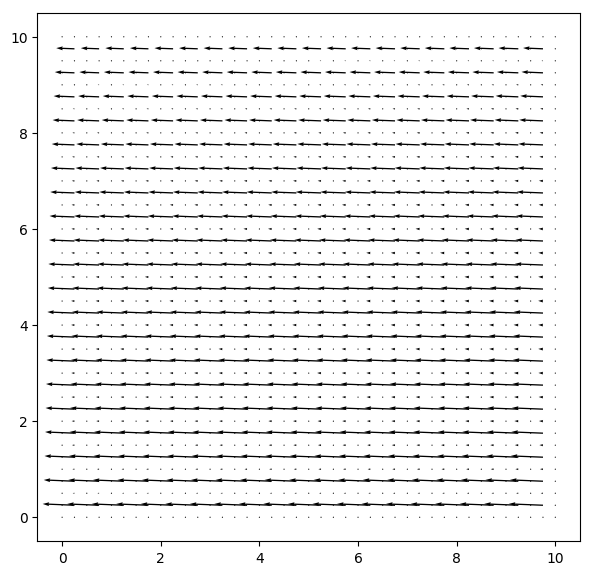

In [19]:
fig = plt.figure(figsize = (7,7), dpi=100)
plt.quiver(X, Y, u, v);

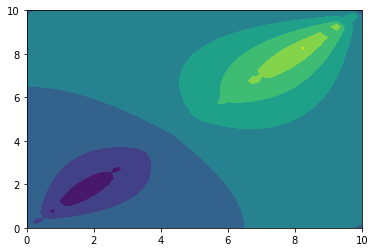

In [20]:
#plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.contourf(X,Y,p)

The results absolutely blow up. After all the understanding of the concepts that I misunderstood previously and debugging for a long time still getting weird results, I decided to simplify the scheme trying to find which part is wrong. So I created a notebook <font color='green'>Project_test.ipynb</font> , please go to that notebook for details I found with using $\theta=0$, which means explicit treatment for viscous term. Then I also studied with fully explicit scheme in notebook <font color='green'>Project_explicit.ipynb</font>, which gives best results for now.

## Conclusion (for now)

Comparing the results from <font color='green'>Project_test.ipynb</font> and this main notebook, I found the most fatal problem must be in the 2nd step since they have the same 1st step. I feel the implicit linear system in 2nd step solving for time step (n+1) is less likely to have problem than the pressure Poisson equation. Especially, if I use artificial Neumann boundary conditions in the pressure Poisson equation, it will become very difficult to converge to required L2-norm.

Further comparing to <font color='green'>Project_explicit.ipynb</font>, which is able to give results much closer to what it should be, I think the original problem could be something with the method itself. Although the method is surely correct mathematically, the matrix $(I-\theta \Delta t \nu \nabla^2)$ in the pressure Poisson equation is the most suspicious term which could lead the solution to wrong ways. This specific Poisson equation may require boundary conditions for pressure or even some more advanced requirements numerically.

## Acknowledgments 

First, I would like to thank Prof. A. Ahmadia for his instructions and great supports to this project.
I would also like to thank Dr. O. Mesnard, who really helped me at last moment before due, and will help me hopefully finish the project. 

## Reference

[1] Kim, J. and Moin, P. (1985). Application of a fractional-step method to incompressible Navier-Stokes equations. Journal of Computational Physics, Vol. 59, Issue 2, June 1985, Pages 308-323.

[2] Blasco, J., Codina, R. and Huerta, A. (1995). A fractional-step method for the incompressible Navier-Stokes equations related to a predictor-multicorrector algorithm. International journal for numerical methods in fluids, vol. 28, no. 10.

[3] Barba, L. A. (2014). Practical Numerical Methods with Python. Retrieved from https://github.com/numerical-mooc.

[4] Wikipedia, Projection method (fluid dynamics), https://en.wikipedia.org/wiki/Projection_method_(fluid_dynamics).

[5] Chorin, A. J.(1967). A numerical method for solving incompressible viscous flow problems, Journal of Computational Physics, Vol. 135, 1997, pages 118-125.